<a href="https://colab.research.google.com/github/Tharindu-dd/ML_Project/blob/main/Sri_Lanka_Vehicle_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project
tharindu.dissanayake@dialog.lk

## ML model to predict vehicle price in Sri Lanka

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [44]:
file_name = r'https://raw.githubusercontent.com/Tharindu-dd/ML_Project/main/vehicle_data.csv'

# Load CSV File
data = pd.read_csv(file_name, low_memory=False)
data.sample(5)

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Seller_type,published_date
71633,Honda Vezel RS SENSING 2016,"Posted by Farzan on 2021-11-01 12:58 pm, Mawan...","Rs. 9,550,000",Honda,Vezel RS SENSING,NaN,2016,Used,Automatic,SUV,Petrol,1500,45000,Mawanella,Member,11/1/2021 12:58
96309,Toyota CE110 1997,"Posted by Gunasena on 2021-10-13 10:44 pm, Matara","Rs. 2,725,000",Toyota,CE110,NaN,1997,Used,Automatic,Car,Diesel,2000,-,Matara,Member,10/13/2021 22:44
95098,Micro Loader 2014,"Posted by Janaka on 2021-10-15 7:53 am, Nittam...","Rs. 760,000",Micro,Loader,NaN,2014,Used,Manual,Lorry,Diesel,2000,25000,Nittambuwa,Member,10/15/2021 7:53
9898,Nissan Sunny B210 1982 for sale,"Posted on 30 Jun 2:11 pm, Kuliyapitiya, Kurune...","Rs 430,000",Nissan,Sunny,B210,1982,Used,Manual,NaN,Petrol,"1,500 cc","250,000 km","Kuliyapitiya, Kurunegala",Member,6/30/2022 14:11
59636,Toyota Premio 2017 for sale,"Posted on 04 Oct 9:18 pm, Kundasale, Kandy","Rs 14,800,000",Toyota,Premio,NaN,2017,Used,Automatic,Saloon,Petrol,"1,500 cc","54,500 km","Kundasale, Kandy",Member,10/4/2022 21:18


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123971 entries, 0 to 123970
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Title           123971 non-null  object
 1   Sub_title       123971 non-null  object
 2   Price           123971 non-null  object
 3   Brand           123971 non-null  object
 4   Model           123970 non-null  object
 5   Edition         47538 non-null   object
 6   Year            123971 non-null  int64 
 7   Condition       123971 non-null  object
 8   Transmission    123970 non-null  object
 9   Body            118876 non-null  object
 10  Fuel            123971 non-null  object
 11  Capacity        123766 non-null  object
 12  Mileage         123971 non-null  object
 13  Location        123971 non-null  object
 14  Seller_type     123971 non-null  object
 15  published_date  123971 non-null  object
dtypes: int64(1), object(15)
memory usage: 15.1+ MB


In [46]:
data.isna().sum()

Title                 0
Sub_title             0
Price                 0
Brand                 0
Model                 1
Edition           76433
Year                  0
Condition             0
Transmission          1
Body               5095
Fuel                  0
Capacity            205
Mileage               0
Location              0
Seller_type           0
published_date        0
dtype: int64

In [47]:
data.drop(axis=1,columns='Edition',inplace=True)
data.dropna(how='any', axis=0, inplace=True)

In [48]:
data.isna().sum()

Title             0
Sub_title         0
Price             0
Brand             0
Model             0
Year              0
Condition         0
Transmission      0
Body              0
Fuel              0
Capacity          0
Mileage           0
Location          0
Seller_type       0
published_date    0
dtype: int64

In [49]:
data.shape

(118669, 15)

In [50]:
print(data.describe(include='all').transpose())

                   count  unique                                       top  \
Title             118669   42664                          Suzuki Alto 2015   
Sub_title         118669  112202  Posted on 30 Jun 9:05 am, Matara, Matara   
Price             118669    5239                                Negotiable   
Brand             118669     123                                    Toyota   
Model             118669    8488                                      Alto   
Year            118669.0     NaN                                       NaN   
Condition         118669       5                                      Used   
Transmission      118669      21                                 Automatic   
Body              118669      22                                       Car   
Fuel              118669       9                                    Petrol   
Capacity          118669    1831                                  1,500 cc   
Mileage           118669   16809                                

In [51]:
data.drop(data.loc[data['Price']==' Negotiable'].index, inplace=True)

In [52]:
sorted(data['Brand'].unique())

['Acura',
 'Alfa Romeo',
 'Alfa-Romeo',
 'Aprilia',
 'Ashok-Leyland',
 'Aston',
 'Aston Martin',
 'Atco',
 'Audi',
 'Austin',
 'BMW',
 'Bajaj',
 'Bentley',
 'Buick',
 'CAT',
 'Cal',
 'Ceygra',
 'Changan',
 'Chery',
 'Chevrolet',
 'Chrysler',
 'Citroen',
 'DFSK',
 'Daewoo',
 'Daido',
 'Daihatsu',
 'Datsun',
 'Demak',
 'Eicher',
 'FAW',
 'Fiat',
 'Force',
 'Ford',
 'Foton',
 'Geely',
 'HINO',
 'Hero',
 'Hero-Honda',
 'Higer',
 'Hillman',
 'Hitachi',
 'Honda',
 'Hummer',
 'Hyundai',
 'Isuzu',
 'Iveco',
 'JAC',
 'JCB',
 'JMC',
 'Jaguar',
 'Jeep',
 'JiaLing',
 'John-Deere',
 'KMC',
 'KTM',
 'Kawasaki',
 'Kia',
 'Kinetic',
 'Kobelco',
 'Komatsu',
 'Kubota',
 'Land Rover',
 'Land-Rover',
 'Lexus',
 'Loncin',
 'MG',
 'Mahindra',
 'Maruti',
 'Maruti Suzuki',
 'Massey-Ferguson',
 'Mazda',
 'Mercedes Benz',
 'Mercedes-Benz',
 'Micro',
 'Mini',
 'Minnelli',
 'Mitsubishi',
 'Morris',
 'Moto Guzzi',
 'New-Holland',
 'Nissan',
 'Opel',
 'Other',
 'Other brand',
 'Perodua',
 'Peugeot',
 'Piaggio',
 'P

In [53]:
data['Model']=data['Model'].str.strip()
data['Brand']=data['Brand'].str.replace('-', ' ')
data['Brand']=data['Brand'].str.replace('Aston Martin', 'Aston')
data['Brand']=data['Brand'].str.replace('Other brand', 'Other')
data['Brand']=data['Brand'].str.replace('Ssang Yong', 'Ssangyong')
sorted(data['Brand'].unique())

['Acura',
 'Alfa Romeo',
 'Aprilia',
 'Ashok Leyland',
 'Aston',
 'Atco',
 'Audi',
 'Austin',
 'BMW',
 'Bajaj',
 'Bentley',
 'Buick',
 'CAT',
 'Cal',
 'Ceygra',
 'Changan',
 'Chery',
 'Chevrolet',
 'Chrysler',
 'Citroen',
 'DFSK',
 'Daewoo',
 'Daido',
 'Daihatsu',
 'Datsun',
 'Demak',
 'Eicher',
 'FAW',
 'Fiat',
 'Force',
 'Ford',
 'Foton',
 'Geely',
 'HINO',
 'Hero',
 'Hero Honda',
 'Higer',
 'Hillman',
 'Hitachi',
 'Honda',
 'Hummer',
 'Hyundai',
 'Isuzu',
 'Iveco',
 'JAC',
 'JCB',
 'JMC',
 'Jaguar',
 'Jeep',
 'JiaLing',
 'John Deere',
 'KMC',
 'KTM',
 'Kawasaki',
 'Kia',
 'Kinetic',
 'Kobelco',
 'Komatsu',
 'Kubota',
 'Land Rover',
 'Lexus',
 'Loncin',
 'MG',
 'Mahindra',
 'Maruti',
 'Maruti Suzuki',
 'Massey Ferguson',
 'Mazda',
 'Mercedes Benz',
 'Micro',
 'Mini',
 'Minnelli',
 'Mitsubishi',
 'Morris',
 'Moto Guzzi',
 'New Holland',
 'Nissan',
 'Opel',
 'Other',
 'Perodua',
 'Peugeot',
 'Piaggio',
 'Pontiac',
 'Porsche',
 'Powertrac',
 'Proton',
 'Range Rover',
 'Ranomoto',
 'Rena

In [54]:
sorted(data['Model'].unique())

['-',
 '-5',
 '1 Ton Vibration Roller',
 '100',
 '1000',
 '101',
 '1012',
 '102',
 '102 Elephant Back',
 '1020',
 '103',
 '104',
 '106',
 '1060',
 '107',
 '107 SSR',
 '107 SSRX',
 '108',
 '110',
 '110 COROLLA',
 '110 Corolla',
 '110 GL',
 '110 Reveira',
 '110 Riviera',
 '110 SE Saloon L Grade',
 '110 Sprinter',
 '110 Sprinter L Grade',
 '110 Sprinter Vintage',
 '110 XE Saloon',
 '110 Xe Saloon Anniversary',
 '1100',
 '1109',
 '1109 EX2',
 '1109 Ex2',
 '110cc',
 '113',
 '116i',
 '118i',
 '118i M Sport Convertible',
 '12',
 '12 JCB',
 '120',
 '120-3 Landy',
 '1200',
 '120G',
 '121 G Grade Limited',
 '121 X Grade',
 '121 XLI',
 '1210',
 '123',
 '125',
 '125 16H',
 '125 Benly',
 '125 CBX Custom',
 '125 Deluxe',
 '125 EU',
 '125 GN',
 '125 Twin',
 '125 Twin Benly',
 '125T',
 '125h',
 '127',
 '129',
 '13 Sri',
 '1300',
 '1313',
 '1313 Bowser',
 '135',
 '135 D',
 '135 DL',
 '135D',
 '135DL',
 '135d',
 '135overy',
 '141 LX',
 '145',
 '146',
 '15 10',
 '150',
 '150 Dash 3',
 '150 Dash 3 Short',

In [55]:
data['Model']=data['Model'].str.strip()
data['Model']=data['Model'].str.replace('-', ' ')
data['Model']=data['Model'].str.replace(r'\s+', ' ', regex=True)
data['Model']=data['Model'].str.lower()
sorted(data['Model'].unique())

[' ',
 ' 5',
 '1 ton vibration roller',
 '100',
 '1000',
 '101',
 '1012',
 '102',
 '102 elephant back',
 '1020',
 '103',
 '104',
 '106',
 '1060',
 '107',
 '107 ssr',
 '107 ssrx',
 '108',
 '110',
 '110 corolla',
 '110 gl',
 '110 reveira',
 '110 riviera',
 '110 se saloon l grade',
 '110 sprinter',
 '110 sprinter l grade',
 '110 sprinter vintage',
 '110 xe saloon',
 '110 xe saloon anniversary',
 '1100',
 '1109',
 '1109 ex2',
 '110cc',
 '113',
 '116i',
 '118i',
 '118i m sport convertible',
 '12',
 '12 jcb',
 '120',
 '120 3 landy',
 '1200',
 '120g',
 '121 g grade limited',
 '121 x grade',
 '121 xli',
 '1210',
 '123',
 '125',
 '125 16h',
 '125 benly',
 '125 cbx custom',
 '125 deluxe',
 '125 eu',
 '125 gn',
 '125 twin',
 '125 twin benly',
 '125h',
 '125t',
 '127',
 '129',
 '13 sri',
 '1300',
 '1313',
 '1313 bowser',
 '135',
 '135 d',
 '135 dl',
 '135d',
 '135dl',
 '135overy',
 '141 lx',
 '145',
 '146',
 '15 10',
 '150',
 '150 dash 3',
 '150 dash 3 short',
 '150 prado 6 forward',
 '1500',
 '15

In [56]:
data['Condition'].value_counts()

Used             109857
Reconditioned      1409
Recondition         854
New                 544
e                   513
Name: Condition, dtype: int64

In [57]:
data.drop(data.loc[data['Condition']=='e'].index, inplace=True)
data['Condition']=data['Condition'].str.replace('Reconditioned', 'Recondition')
data['Condition'].value_counts()

Used           109857
Recondition      2263
New               544
Name: Condition, dtype: int64

In [58]:
data['Transmission'].value_counts()

Automatic             68727
Manual                38782
Tiptronic              5093
Other transmission       39
175                       4
205                       4
150                       3
1500                      2
0                         2
1200                      1
50                        1
444444444                 1
450                       1
1490                      1
11                        1
2001                      1
650                       1
Name: Transmission, dtype: int64

In [59]:
data.drop(data.loc[data['Transmission'].isin(['Automatic','Manual','Tiptronic','Other transmission']) == False].index, inplace=True)
data['Transmission'].value_counts()

Automatic             68727
Manual                38782
Tiptronic              5093
Other transmission       39
Name: Transmission, dtype: int64

In [60]:
data['Body'].value_counts()

Hatchback        21031
Car              20019
Saloon           18810
Motorbike        14401
SUV / 4x4        12641
Van               5026
Three Wheel       4686
Lorry             3897
SUV               3237
Station wagon     2683
Pickup            1343
Bus                925
Unregistered       854
Tractor            723
MPV                614
CoupÃ©/Sports      576
Wagon              470
Heavy-Duty         328
Convertible        230
Cab                144
Other                3
Name: Body, dtype: int64

In [61]:
data['Fuel'].value_counts()

Petrol             78889
Diesel             20426
Hybrid             12759
Electric             481
Other fuel type       42
CNG                   37
Gas                    7
Name: Fuel, dtype: int64

In [62]:
data.drop(data.loc[data['Year']==0].index, inplace=True)

In [63]:
sorted(data['Capacity'].unique())

['-',
 '-1290',
 '-1448',
 '-1500',
 '-1600',
 '-2200',
 '-4',
 '-4330',
 '-800',
 '0',
 '1',
 '1 cc',
 '1,000 cc',
 '1,005 cc',
 '1,020 cc',
 '1,030 cc',
 '1,048 cc',
 '1,050 cc',
 '1,061 cc',
 '1,075 cc',
 '1,084 cc',
 '1,085 cc',
 '1,086 cc',
 '1,098 cc',
 '1,100 cc',
 '1,130 cc',
 '1,150 cc',
 '1,155 cc',
 '1,160 cc',
 '1,166 cc',
 '1,170 cc',
 '1,171 cc',
 '1,174 cc',
 '1,190 cc',
 '1,192 cc',
 '1,193 cc',
 '1,195 cc',
 '1,197 cc',
 '1,198 cc',
 '1,199 cc',
 '1,200 cc',
 '1,220 cc',
 '1,230 cc',
 '1,234 cc',
 '1,240 cc',
 '1,242 cc',
 '1,244 cc',
 '1,248 cc',
 '1,249 cc',
 '1,250 cc',
 '1,260 cc',
 '1,265 cc',
 '1,270 cc',
 '1,275 cc',
 '1,277 cc',
 '1,280 cc',
 '1,290 cc',
 '1,294 cc',
 '1,295 cc',
 '1,296 cc',
 '1,298 cc',
 '1,299 cc',
 '1,300 cc',
 '1,303 cc',
 '1,310 cc',
 '1,317 cc',
 '1,320 cc',
 '1,323 cc',
 '1,324 cc',
 '1,325 cc',
 '1,328 cc',
 '1,329 cc',
 '1,330 cc',
 '1,331 cc',
 '1,332 cc',
 '1,333 cc',
 '1,339 cc',
 '1,340 cc',
 '1,341 cc',
 '1,342 cc',
 '1,343 cc',


In [64]:
data.drop(data.loc[data['Capacity']=='-'].index, inplace=True)
data.drop(data.loc[data['Capacity']=='Manual'].index, inplace=True)
data.drop(data.loc[data['Capacity']=='Automatic'].index, inplace=True)
sorted(data['Capacity'].unique())

['-1290',
 '-1448',
 '-1500',
 '-1600',
 '-2200',
 '-4',
 '-4330',
 '-800',
 '0',
 '1',
 '1 cc',
 '1,000 cc',
 '1,005 cc',
 '1,020 cc',
 '1,030 cc',
 '1,048 cc',
 '1,050 cc',
 '1,061 cc',
 '1,075 cc',
 '1,084 cc',
 '1,085 cc',
 '1,086 cc',
 '1,098 cc',
 '1,100 cc',
 '1,130 cc',
 '1,150 cc',
 '1,155 cc',
 '1,160 cc',
 '1,166 cc',
 '1,170 cc',
 '1,171 cc',
 '1,174 cc',
 '1,190 cc',
 '1,192 cc',
 '1,193 cc',
 '1,195 cc',
 '1,197 cc',
 '1,198 cc',
 '1,199 cc',
 '1,200 cc',
 '1,220 cc',
 '1,230 cc',
 '1,234 cc',
 '1,240 cc',
 '1,242 cc',
 '1,244 cc',
 '1,248 cc',
 '1,249 cc',
 '1,250 cc',
 '1,260 cc',
 '1,265 cc',
 '1,270 cc',
 '1,275 cc',
 '1,277 cc',
 '1,280 cc',
 '1,290 cc',
 '1,294 cc',
 '1,295 cc',
 '1,296 cc',
 '1,298 cc',
 '1,299 cc',
 '1,300 cc',
 '1,303 cc',
 '1,310 cc',
 '1,317 cc',
 '1,320 cc',
 '1,323 cc',
 '1,324 cc',
 '1,325 cc',
 '1,328 cc',
 '1,329 cc',
 '1,330 cc',
 '1,331 cc',
 '1,332 cc',
 '1,333 cc',
 '1,339 cc',
 '1,340 cc',
 '1,341 cc',
 '1,342 cc',
 '1,343 cc',
 '1,34

In [65]:
sorted(data['Mileage'].unique())

['-',
 '0',
 '0 km',
 '1',
 '1 km',
 '1,000 km',
 '1,000,000 km',
 '1,080 km',
 '1,100 km',
 '1,111 km',
 '1,200 km',
 '1,220 km',
 '1,234 km',
 '1,235 km',
 '1,248 km',
 '1,250 km',
 '1,264 km',
 '1,268 km',
 '1,275 km',
 '1,300 km',
 '1,330 km',
 '1,350 km',
 '1,400 km',
 '1,480 km',
 '1,500 km',
 '1,506 km',
 '1,514 km',
 '1,600 km',
 '1,690 km',
 '1,700 km',
 '1,788 km',
 '1,800 km',
 '1,890 km',
 '1,900 km',
 '1,903 km',
 '1,923 km',
 '1,950 km',
 '1,987 km',
 '10',
 '10 km',
 '10,000 km',
 '10,006 km',
 '10,012 km',
 '10,047 km',
 '10,064 km',
 '10,100 km',
 '10,164 km',
 '10,165 km',
 '10,200 km',
 '10,206 km',
 '10,250 km',
 '10,300 km',
 '10,320 km',
 '10,324 km',
 '10,360 km',
 '10,400 km',
 '10,500 km',
 '10,502 km',
 '10,523 km',
 '10,534 km',
 '10,544 km',
 '10,550 km',
 '10,589 km',
 '10,600 km',
 '10,646 km',
 '10,649 km',
 '10,676 km',
 '10,678 km',
 '10,684 km',
 '10,700 km',
 '10,730 km',
 '10,773 km',
 '10,800 km',
 '10,850 km',
 '10,854 km',
 '10,861 km',
 '10,880 k

In [66]:
data.drop(data.loc[data['Mileage']=='-'].index, inplace=True)
sorted(data['Mileage'].unique())

['0',
 '0 km',
 '1',
 '1 km',
 '1,000 km',
 '1,000,000 km',
 '1,080 km',
 '1,100 km',
 '1,111 km',
 '1,200 km',
 '1,220 km',
 '1,234 km',
 '1,235 km',
 '1,248 km',
 '1,250 km',
 '1,264 km',
 '1,268 km',
 '1,275 km',
 '1,300 km',
 '1,330 km',
 '1,350 km',
 '1,400 km',
 '1,480 km',
 '1,500 km',
 '1,506 km',
 '1,514 km',
 '1,600 km',
 '1,690 km',
 '1,700 km',
 '1,788 km',
 '1,800 km',
 '1,890 km',
 '1,900 km',
 '1,903 km',
 '1,923 km',
 '1,950 km',
 '1,987 km',
 '10',
 '10 km',
 '10,000 km',
 '10,006 km',
 '10,012 km',
 '10,047 km',
 '10,064 km',
 '10,100 km',
 '10,164 km',
 '10,165 km',
 '10,200 km',
 '10,206 km',
 '10,250 km',
 '10,300 km',
 '10,320 km',
 '10,324 km',
 '10,360 km',
 '10,400 km',
 '10,500 km',
 '10,502 km',
 '10,523 km',
 '10,534 km',
 '10,544 km',
 '10,550 km',
 '10,589 km',
 '10,600 km',
 '10,646 km',
 '10,649 km',
 '10,676 km',
 '10,678 km',
 '10,684 km',
 '10,700 km',
 '10,730 km',
 '10,773 km',
 '10,800 km',
 '10,850 km',
 '10,854 km',
 '10,861 km',
 '10,880 km',
 '

In [67]:
Beand_unique_list = data['Brand'].unique().tolist()
data['Brand_type'] = data['Brand']
replacements_Brand = {key: i for i, key in enumerate(Beand_unique_list)}
print(replacements_Brand)
data['Brand_type'].replace(replacements_Brand, inplace=True)

Model_unique_list = data['Model'].unique().tolist()
data['Model_type'] = data['Model']
replacements_Model = {key: i for i, key in enumerate(Model_unique_list)}
print(replacements_Model)
data['Model_type'].replace(replacements_Model, inplace=True)

Condition_unique_list = data['Condition'].unique().tolist()
data['Condition_type'] = data['Condition']
replacements_Condition = {key: i for i, key in enumerate(Condition_unique_list)}
print(replacements_Condition)
data['Condition_type'].replace(replacements_Condition, inplace=True)

Transmission_unique_list = data['Transmission'].unique().tolist()
data['Transmission_type'] = data['Transmission']
replacements_Transmission = {key: i for i, key in enumerate(Transmission_unique_list)}
print(replacements_Transmission)
data['Transmission_type'].replace(replacements_Transmission, inplace=True)

Body_unique_list = data['Body'].unique().tolist()
data['Body_type'] = data['Body']
replacements_Body = {key: i for i, key in enumerate(Body_unique_list)}
print(replacements_Body)
data['Body_type'].replace(replacements_Body, inplace=True)

Fuel_unique_list = data['Fuel'].unique().tolist()
data['Fuel_type'] = data['Fuel']
replacements_Fuel = {key: i for i, key in enumerate(Fuel_unique_list)}
print(replacements_Fuel)
data['Fuel_type'].replace(replacements_Fuel, inplace=True)

{'Honda': 0, 'Jaguar': 1, 'Toyota': 2, 'Suzuki': 3, 'MG': 4, 'Mitsubishi': 5, 'Peugeot': 6, 'Mercedes Benz': 7, 'Mazda': 8, 'Land Rover': 9, 'BMW': 10, 'Hyundai': 11, 'Micro': 12, 'Audi': 13, 'Daihatsu': 14, 'Nissan': 15, 'Lexus': 16, 'Kia': 17, 'Perodua': 18, 'Ford': 19, 'Chery': 20, 'Tata': 21, 'Renault': 22, 'Aston': 23, 'Chevrolet': 24, 'Other': 25, 'Subaru': 26, 'Alfa Romeo': 27, 'Zotye': 28, 'DFSK': 29, 'Mahindra': 30, 'Skoda': 31, 'Volkswagen': 32, 'Maruti Suzuki': 33, 'Jeep': 34, 'Ssangyong': 35, 'Hummer': 36, 'Datsun': 37, 'Tesla': 38, 'Mini': 39, 'Isuzu': 40, 'Fiat': 41, 'Porsche': 42, 'Morris': 43, 'Austin': 44, 'Opel': 45, 'Daewoo': 46, 'Proton': 47, 'Volvo': 48, 'Rover': 49, 'Chrysler': 50, 'Maruti': 51, 'Geely': 52, 'Citroen': 53, 'Smart': 54, 'Moto Guzzi': 55, 'Vauxhall': 56, 'Pontiac': 57, 'SEAT': 58, 'Buick': 59, 'TVS': 60, 'Hero': 61, 'Bajaj': 62, 'Piaggio': 63, 'Yamaha': 64, 'JAC': 65, 'FAW': 66, 'Komatsu': 67, 'Eicher': 68, 'Ranomoto': 69, 'Kubota': 70, 'Force': 71,

In [68]:
def extract_num(row):
    amount = ""
    for w in row:
        if w.isnumeric():
            amount += w
    return int(amount)

data["Price_rs"] = data["Price"].apply(extract_num)
data["Capacity_cc"] = data["Capacity"].apply(extract_num)
data["Mileage_km"] = data["Mileage"].apply(extract_num)

In [69]:
print(data.describe(include='all').transpose())

                      count unique                                       top  \
Title                105294  38626     Suzuki Wagon R Stingray 2018 for sale   
Sub_title            105294  98910  Posted on 30 Jun 9:05 am, Matara, Matara   
Price                105294   5163                              Rs 6,500,000   
Brand                105294    116                                    Toyota   
Model                105294   5496                                      alto   
Year               105294.0    NaN                                       NaN   
Condition            105294      3                                      Used   
Transmission         105294      4                                 Automatic   
Body                 105294     21                                 Hatchback   
Fuel                 105294      7                                    Petrol   
Capacity             105294   1725                                  1,500 cc   
Mileage              105294  15956      

Text(0.5, 1.0, 'Capacity_cc')

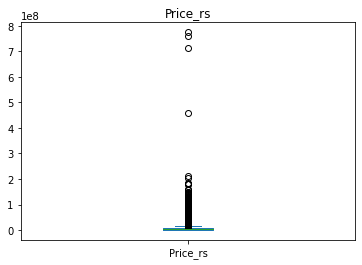

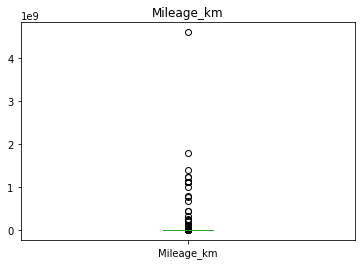

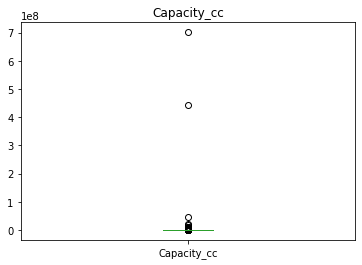

In [70]:
f,ax0 = plt.subplots()
data['Price_rs'].plot(kind='box', ax=ax0)
ax0.set_title("Price_rs")
f,ax1 = plt.subplots()
data['Mileage_km'].plot(kind='box', ax=ax1)
ax1.set_title("Mileage_km")
f,ax2 = plt.subplots()
data['Capacity_cc'].plot(kind='box', ax=ax2)
ax2.set_title("Capacity_cc")

Text(0.5, 1.0, 'Capacity_cc')

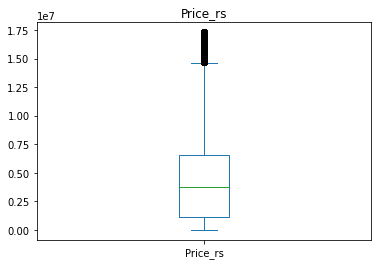

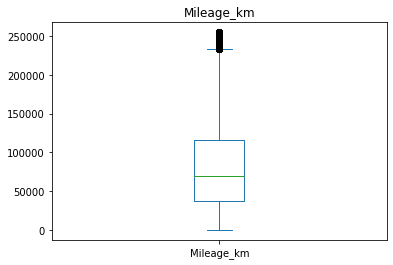

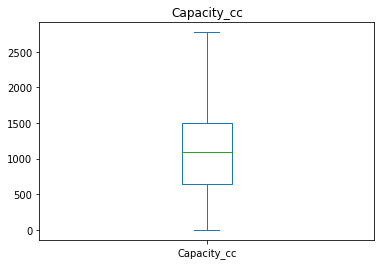

In [71]:
Price_rs_25 = data['Price_rs'].describe()['25%']
Price_rs_75 = data['Price_rs'].describe()['75%']
Price_rs_lower = Price_rs_25 - 1.5*(Price_rs_75 - Price_rs_25)
Price_rs_upper = Price_rs_75 + 1.5*(Price_rs_75 - Price_rs_25)
outlier_index = data[ (data['Price_rs'] > Price_rs_upper) | (data['Price_rs']  < Price_rs_lower) ].index
data.drop(outlier_index, inplace = True)

Mileage_km_25 = data['Mileage_km'].describe()['25%']
Mileage_km_75 = data['Mileage_km'].describe()['75%']
Mileage_km_lower = Mileage_km_25 - 1.5*(Mileage_km_75 - Mileage_km_25)
Mileage_km_upper = Mileage_km_75 + 1.5*(Mileage_km_75 - Mileage_km_25)
outlier_index = data[ (data['Mileage_km'] > Mileage_km_upper) | (data['Mileage_km']  < Mileage_km_lower) ].index
data.drop(outlier_index, inplace = True)

Capacity_cc_25 = data['Capacity_cc'].describe()['25%']
Capacity_cc_75 = data['Capacity_cc'].describe()['75%']
Capacity_cc_lower = Capacity_cc_25 - 1.5*(Capacity_cc_75 - Capacity_cc_25)
Capacity_cc_upper = Capacity_cc_75 + 1.5*(Capacity_cc_75 - Capacity_cc_25)
outlier_index = data[ (data['Capacity_cc'] > Capacity_cc_upper) | (data['Capacity_cc']  < Capacity_cc_lower) ].index
data.drop(outlier_index, inplace = True)

f,ax4 = plt.subplots()
data['Price_rs'].plot(kind='box', ax=ax4)
ax4.set_title("Price_rs")
f,ax5 = plt.subplots()
data['Mileage_km'].plot(kind='box', ax=ax5)
ax5.set_title("Mileage_km")
f,ax6 = plt.subplots()
data['Capacity_cc'].plot(kind='box', ax=ax6)
ax6.set_title("Capacity_cc")

In [72]:
data['published_date'] = pd.to_datetime(data['published_date'])
# for year
data['published_year'] = pd.DatetimeIndex(data['published_date']).year
# for month
data['published_month'] = pd.DatetimeIndex(data['published_date']).month
# for day
data['published_day'] = pd.DatetimeIndex(data['published_date']).day

In [73]:
print(data.describe(include='all').transpose())

                     count unique                                       top  \
Title                88377  30780     Suzuki Wagon R Stingray 2018 for sale   
Sub_title            88377  83386  Posted on 30 Jun 9:05 am, Matara, Matara   
Price                88377   4085                              Rs 6,500,000   
Brand                88377    111                                    Toyota   
Model                88377   4441                                      alto   
Year               88377.0    NaN                                       NaN   
Condition            88377      3                                      Used   
Transmission         88377      4                                 Automatic   
Body                 88377     21                                 Hatchback   
Fuel                 88377      7                                    Petrol   
Capacity             88377   1086                                  1,500 cc   
Mileage              88377  13828                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


In [74]:
correlation_matrix = data[['Brand_type','Model_type','Year','Condition_type','Transmission_type','Body_type','Fuel_type','Mileage_km','Capacity_cc','Location','published_year','published_month','published_day','Price_rs']].corr()
correlation_matrix

,Brand_type,Model_type,Year,Condition_type,Transmission_type,Body_type,Fuel_type,Mileage_km,Capacity_cc,published_year,published_month,published_day,Price_rs
Brand_type,1.000000,0.252560,0.020206,-0.019509,0.139888,0.368803,0.195846,-0.256732,-0.473164,-0.391104,0.198899,0.001860,-0.465063
Model_type,0.252560,1.000000,-0.126948,-0.015022,0.043570,0.477476,0.057281,-0.047414,-0.133160,-0.498710,0.247847,0.013330,-0.236172
Year,0.020206,-0.126948,1.000000,0.075175,-0.336634,0.001798,-0.107602,-0.460994,-0.261757,-0.020432,0.023403,-0.005125,0.354813
Condition_type,-0.019509,-0.015022,0.075175,1.000000,-0.005384,-0.033929,0.029696,-0.136481,-0.018466,0.077925,-0.060270,-0.000719,0.083564
Transmission_type,0.139888,0.043570,-0.336634,-0.005384,1.000000,0.009811,0.092604,0.102549,0.088338,0.012562,-0.019360,-0.002545,-0.217992
Body_type,0.368803,0.477476,0.001798,-0.033929,0.009811,1.000000,0.050784,-0.161485,-0.326230,-0.936736,0.481363,-0.008141,-0.355287
Fuel_type,0.195846,0.057281,-0.107602,0.029696,0.092604,0.050784,1.000000,-0.056139,-0.302537,-0.074597,0.019351,-0.000320,-0.253482
Mileage_km,-0.256732,-0.047414,-0.460994,-0.136481,0.102549,-0.161485,-0.056139,1.000000,0.492845,0.165180,-0.087987,0.000395,-0.022828
Capacity_cc,-0.473164,-0.133160,-0.261757,-0.018466,0.088338,-0.326230,-0.302537,0.492845,1.000000,0.369350,-0.199370,0.002186,0.515301
published_year,-0.391104,-0.498710,-0.020432,0.077925,0.012562,-0.936736,-0.074597,0.165180,0.369350,1.000000,-0.516222,0.010117,0.371440


In [75]:
X_variables = ['Brand_type','Year','Condition_type','Transmission_type','Body_type','Fuel_type','Mileage_km','Capacity_cc','published_year','published_month','published_day']
y_variable = 'Price_rs'

print(F"X_variables = {X_variables}")
print(F"y_variable = {y_variable}")

X = data[X_variables]
y = data[y_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train size:", X_train.shape[0])
print("X_test size:", X_test.shape[0])

X = data[X_variables]
y = data[y_variable]

X_variables = ['Brand_type', 'Year', 'Condition_type', 'Transmission_type', 'Body_type', 'Fuel_type', 'Mileage_km', 'Capacity_cc', 'published_year', 'published_month', 'published_day']
y_variable = Price_rs
X_train size: 61863
X_test size: 26514


In [76]:
# Create model object
model1 = LinearRegression()

# Fit regression model
reg1 = model1.fit(X, y)

r_sq1 = model1.score(X, y)

print(f"coefficient of determination: {r_sq1}")
print(f"intercept: {model1.intercept_}")
print(f"coefficients: {model1.coef_}")

# Predict
y_test_pred = reg1.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_test_pred)
print("R2 score:", r2)

coefficient of determination: 0.6013727784224863
intercept: -949514181.0252552
coefficients: [-3.24399364e+04  1.48042013e+05  6.35628904e+05 -6.57478879e+05
 -8.60873149e+04  4.94306379e+04 -1.29240026e+01  3.54099094e+03
  3.23802046e+05  3.42596354e+04  6.22816962e+02]
R2 score: 0.6168343547019434


In [77]:
# Create model object
model2 = DecisionTreeRegressor(max_depth=40)

# Fit regression model
reg2 = model2.fit(X, y)

r_sq2 = model2.score(X, y)

print(f"coefficient of determination: {r_sq2}")

# Predict
y_test_pred = reg2.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_test_pred)
print("R2 score:", r2)

coefficient of determination: 0.9998640844997204
R2 score: 0.9998186429186563


In [78]:
# Create model object
model3 = linear_model.Lasso(alpha=0.1)

# Fit regression model
reg3 = model3.fit(X, y)

r_sq3 = model3.score(X, y)

print(f"coefficient of determination: {r_sq3}")

# Predict
y_test_pred = reg3.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_test_pred)
print("R2 score:", r2)

coefficient of determination: 0.6013727784224464
R2 score: 0.6168343525853895


In [79]:
# Create model object
model4 = RandomForestRegressor(max_depth=40)

# Fit regression model
reg4 = model4.fit(X, y)

r_sq4 = model4.score(X, y)

print(f"coefficient of determination: {r_sq4}")

# Predict
y_test_pred = reg4.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_test_pred)
print("R2 score:", r2)

coefficient of determination: 0.990876775717298
R2 score: 0.9913842416571139


In [81]:
save_file = 'model_reg2_test.pickle'
pickle.dump(reg2, open(save_file, 'wb'))

In [82]:
# loading from file
model_ = pickle.load(open(save_file, 'rb'))
model_

DecisionTreeRegressor(max_depth=40)